In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pint
# import utilities as util
import plotz
import deck_classes as dc

In [4]:
ureg = pint.UnitRegistry()
ureg.load_definitions('./units/lwfa_def.txt')

In [5]:
# parameters from EPOCH input file

# lengths in micrometers
# times in femtoseconds
# densities in 1/cm**3

# plasma up ramp length
url = 100 * ureg.micrometer
# plasma flat-top length
ftl = 2450 * ureg.micrometer
# plasma skin depth
psd = 2.6575 * ureg.micrometer

# grid resolution
cells_x = 1024
cells_y = 96
cells_z = 96

# moving box limits
x_min = -100 * ureg.micrometer
x_max = -50 * ureg.micrometer
#
y_min = -400 * ureg.micrometer
y_max =  400 * ureg.micrometer
#
z_min = -400 * ureg.micrometer
z_max =  400 * ureg.micrometer

# speed of the window
window_v_x =   0.29919287308 * ureg.micrometer/ureg.femtosecond
# time at which the window should start moving
window_start_time =  166.78204759999997 * ureg.femtosecond

# final simulation time
t_end =  9041.7551465 * ureg.femtosecond

In [6]:
p_min = dc.Point(x_min, y_min, z_min)
p_max = dc.Point(x_max, y_max, z_max)

shape = (cells_x, cells_y, cells_z)
ncells = dc.NrGridPoints(*shape)
winprop = dc.WindowProp(window_v_x, window_start_time, t_end)

mw = dc.MovingWindow(winprop, p_min, p_max, ncells)
dom = dc.Domain(mw)
preplasma = dc.Plasma(psd, url, ftl)
electron = dc.Species(dom, preplasma, 1e-3)

In [7]:
np.sum(electron.rho, axis=2).shape

(96, 1024)

In [8]:
dom.box.x.shape

(1024,)

In [9]:
dom.box.y.shape

(96,)

In [10]:
p2d = plotz.Plot2D(np.sum(electron.rho, axis=2), dom.box.x, dom.box.y, xlabel=r'$x$ ($\mu$m)', 
             ylabel=r'$y$ ($\mu$m)', zlabel=r'$\rho$ (cm$^{-3}$)')

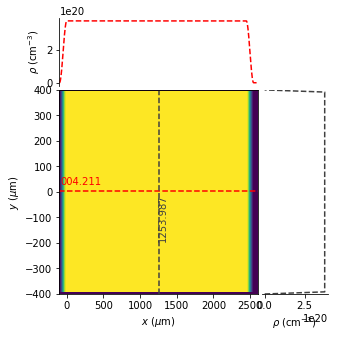

In [11]:
p2d.slice(figsize=(4.8, 4.8), hslice_opts={'ls': '--', 'color': 'red'},
         cmap='viridis')

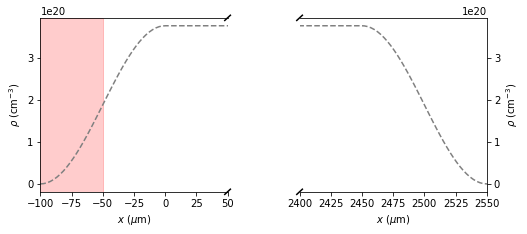

In [12]:
fig, ax = plt.subplots(figsize=(8, 3.2))
xr = dom.box.x[-1]
pm = {'xlim_left':(-preplasma.url.magnitude, 0 + 50), 'xlim_right':(preplasma.ftl.magnitude - 50, preplasma.url.magnitude + preplasma.ftl.magnitude), 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$\rho$ (cm$^{-3}$)'}
so = {'ls': '--', 'color': '0.5'}
r = np.sum(electron.rho, axis=2)
i = r.shape[0]//2
plotz.plot1d_break_x(fig, dom.box.x, r[i], pm, so)
ax.axvspan(mw.box.x[0], mw.box.x[-1], alpha = 0.2, color='red');